In [20]:
!pip install guppy3

     |████████████████████████████████| 614kB 8.1MB/s 


## Import modules

In [35]:
import numpy as np
import itertools

# to get and read data
import os
from zipfile import ZipFile
from scipy.io import arff

# to plot the data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# for neural network
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [36]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/MyDrive/project")
from common_modules import data_f, network_f, patches_f, clusters_f
from char_modules import preprocess_f, plotting_f

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import importlib
importlib.reload(clusters_f)

<module 'common_modules.clusters_f' from '/content/drive/MyDrive/project/common_modules/clusters_f.py'>

## get and read data

get data

In [12]:
if not os.path.exists('CharacterTrajectories'):
  # download zip
  data_f.download_file(url = 'http://www.timeseriesclassification.com/Downloads/CharacterTrajectories.zip',
                        saveAs = 'CharacterTrajectories.zip')
  # extract all the contents of zip file in current directory
  with ZipFile('CharacterTrajectories.zip', 'r') as zipObj:
    zipObj.extractall('CharacterTrajectories')
  print('folder extracted from zip')

else:
    print("folder exists")

folder exists


read data

In [13]:
# ignoring metadata at index 1, arff -> (data,meta)
train_data, train_meta = arff.loadarff('CharacterTrajectories/CharacterTrajectories_TRAIN.arff')
test_data, test_meta = arff.loadarff('CharacterTrajectories/CharacterTrajectories_TEST.arff')

train_data = preprocess_f.remove_nan(train_data)
test_data = preprocess_f.remove_nan(test_data)

# subtract 1 to start indexing from 0
train_data = [[input, label - 1] for input,label in train_data]
test_data = [[input, label - 1] for input,label in test_data]

max length = 182


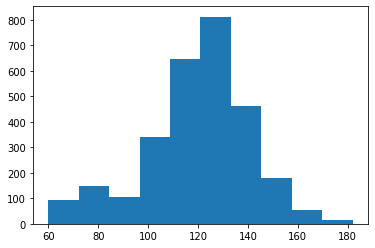

In [14]:
# distribution of sample lenghts
lengths = []

for sample in itertools.chain(train_data,test_data):
  input = sample[0][0]
  input = np.array(input)
  lengths.append(len(input))

print('max length =',np.max(lengths))
_ = plt.hist(lengths)

In [8]:
classes = ['a','b','c','d','e','g','h','l','m','n','o','p','q','r','s','u','v','w','y','z']
print('number of classes :',len(classes))

print('\ntrain data contains',len(train_data),'samples')
print('test data contains',len(test_data),'samples')

print('\neach sample has 3 channels : x,y and force')

number of classes : 20

train data contains 1422 samples
test data contains 1436 samples

each sample has 3 channels : x,y and force


## clustering

In [33]:
train_inputs, train_labels = preprocess_f.resize_samples(train_data,100)

# flatten inputs to 2d array
nsamples, nx, ny = train_inputs.shape
train_inputs = train_inputs.reshape((nsamples,nx*ny))

plot silhoutte index for number of cluster 2 to 20


runtime:  12.608663320541382

memory consumption:
Partition of a set of 1808826 objects. Total size = 139625305 bytes.
 Index  Count   %     Size   % Cumulative  % Kind (class / dict of class)
     0 1029162  57 32933184  24  32933184  24 numpy.float64
     1 214047  12 31174921  22  64108105  46 str
     2 202259  11 16280528  12  80388633  58 tuple
     3  24283   1 10725344   8  91113977  65 list
     4  85670   5  6922217   5  98036194  70 bytes
     5  43652   2  6317240   5 104353434  75 types.CodeType
     6  41019   2  5578584   4 109932018  79 function
     7  12881   1  4970768   4 114902786  82 dict (no owner)
     8   4846   0  4807784   3 119710570  86 type
     9   2136   0  3147104   2 122857674  88 dict of module
<1747 more rows. Type e.g. '_.more' to view.>



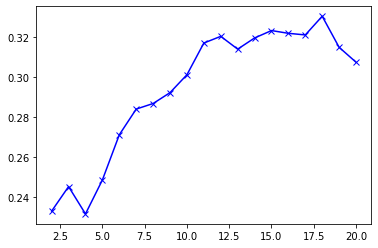

 num_clusters  silhouette     cal_har  dav_bould  adj_rand  adj_mut_inf  v_measure  fowlk_mall
            2    0.232908  423.979819   1.783085  0.083810     0.306534   0.309080    0.293917
            3    0.245155  403.417423   1.578160  0.142532     0.442877   0.446622    0.339162
            4    0.231487  386.491122   1.525203  0.233601     0.537740   0.542035    0.399184
            5    0.248468  363.787704   1.499210  0.279127     0.593076   0.597933    0.430258
            6    0.271046  349.957056   1.337945  0.294650     0.616655   0.622330    0.440045
            7    0.283897  340.218524   1.346605  0.337809     0.657346   0.663232    0.467861
            8    0.286684  349.829363   1.213080  0.375775     0.673535   0.679930    0.486813
            9    0.292114  352.251744   1.172335  0.442331     0.721353   0.727427    0.537876
           10    0.301068  352.981782   1.232364  0.482030     0.746477   0.752612    0.567919
           11    0.316915  357.613633   1.163256  

In [40]:
clusters_f.form_clusters(train_inputs, "KMeans", train_labels)


runtime:  7.469510793685913

memory consumption:
Partition of a set of 1809031 objects. Total size = 139638388 bytes.
 Index  Count   %     Size   % Cumulative  % Kind (class / dict of class)
     0 1029160  57 32933120  24  32933120  24 numpy.float64
     1 214062  12 31176290  22  64109410  46 str
     2 202259  11 16280520  12  80389930  58 tuple
     3  24312   1 10729464   8  91119394  65 list
     4  85674   5  6922131   5  98041525  70 bytes
     5  43652   2  6317240   5 104358765  75 types.CodeType
     6  41016   2  5578176   4 109936941  79 function
     7  12960   1  5000872   4 114937813  82 dict (no owner)
     8   4846   0  4807784   3 119745597  86 type
     9   2136   0  3147104   2 122892701  88 dict of module
<1747 more rows. Type e.g. '_.more' to view.>



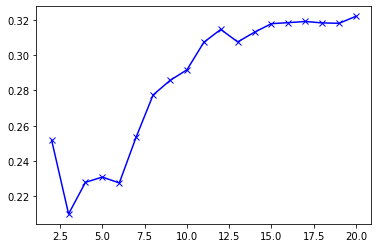

 num_clusters  silhouette     cal_har  dav_bould  adj_rand  adj_mut_inf  v_measure  fowlk_mall
            2    0.251687  331.689990   1.417333  0.041007     0.262624   0.265531    0.264786
            3    0.209996  349.780105   1.723966  0.151336     0.478016   0.481541    0.353254
            4    0.227895  319.393502   1.476209  0.182378     0.538422   0.542994    0.376792
            5    0.230879  307.915187   1.459246  0.226330     0.603279   0.608255    0.407877
            6    0.227534  307.556096   1.497131  0.347831     0.688989   0.693550    0.493214
            7    0.253625  311.848083   1.399329  0.373847     0.718793   0.723660    0.511205
            8    0.277412  320.722633   1.262321  0.386544     0.738101   0.743365    0.519972
            9    0.285628  327.261606   1.218627  0.446887     0.775959   0.780951    0.561652
           10    0.291641  336.530201   1.243826  0.513094     0.789770   0.794871    0.600930
           11    0.307252  346.129832   1.197073  

In [41]:
clusters_f.form_clusters(train_inputs, "AgglomerativeClustering", train_labels)

## patches

In [ ]:
kwargs = {'window_size':20, 'stride':10, 'resizeTo':100, 'medianFilter':True, 'gaussianFilter':True, 'normalize':(-1,1)}

kwargs['data'] = train_data
train_inputs, train_labels, train_indexes = patches_f.dataToPatches(**kwargs)
kwargs['data'] = test_data
test_inputs, test_labels, test_indexes = patches_f.dataToPatches(**kwargs)

create dataset and dataloader

In [ ]:
train_loader, val_loader, test_loader = data_f.createLoaders(train_inputs, train_labels,
                                                                  test_inputs, test_labels,
                                                                  batch_size=32)

### visualize patches

a
original sample


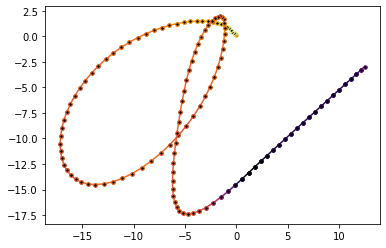

11 patches


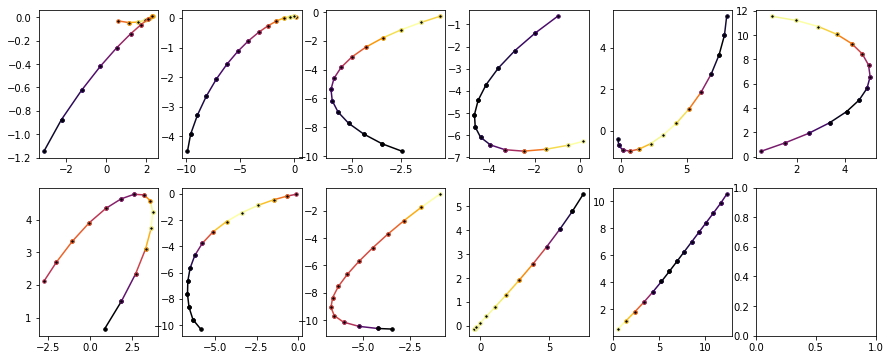

In [ ]:
plotting_f.plotChar(train_data, train_indexes, train_inputs, char='a')

## neural network

### define network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 4 input channels, 6 output channels, row convolution kernel of size 3
        self.conv1 = nn.Conv1d(4, 6, 3)
        self.conv2 = nn.Conv1d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(368, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)

    def forward(self, x):
        # output given by : math.floor((inp-(k-1)-1)/s+1)
        x = F.max_pool1d(F.relu(self.conv1(x)), 2)
        x = F.max_pool1d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

### create network

In [ ]:
net = Net().to(device)

#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### train network

epoch: 15, train loss: 1.687, val loss: 1.711
epoch: 30, train loss: 0.989, val loss: 1.076
epoch: 45, train loss: 0.790, val loss: 0.896
epoch: 60, train loss: 0.671, val loss: 0.843
epoch: 75, train loss: 0.598, val loss: 0.841
epoch: 90, train loss: 0.533, val loss: 0.828
epoch: 105, train loss: 0.486, val loss: 0.793
epoch: 120, train loss: 0.453, val loss: 0.909
epoch: 135, train loss: 0.414, val loss: 0.854
epoch: 150, train loss: 0.386, val loss: 0.861

Finished Training


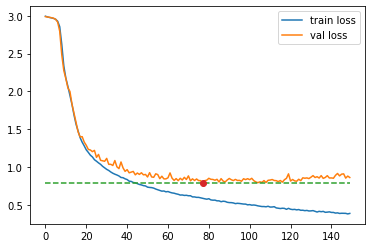

In [ ]:
best_params = network_f.trainNet(net,criterion,optimizer, 
                                  train_loader,val_loader,
                                  epochs=150)

In [ ]:
net.load_state_dict(best_params)

<All keys matched successfully>

### evaluate network

In [ ]:
print("evaluation results on train data")
network_f.evaluate(net,train_loader,classes)
print("evaluation results on test data")
network_f.evaluate(net,test_loader,classes)

evaluation results on train data



              precision    recall  f1-score   support

           a     0.7891    0.7632    0.7759       760
           b     0.6301    0.7929    0.7022       623
           c     0.9683    0.9735    0.9709       377
           d     0.9141    0.7800    0.8418       641
           e     0.9295    0.9606    0.9448       686
           g     0.7989    0.7080    0.7507       589
           h     0.6878    0.5872    0.6335       499
           l     0.9944    0.9781    0.9862       365
           m     0.8000    0.9231    0.8571       611
           n     0.7244    0.5380    0.6174       474
           o     0.9077    0.8817    0.8945       524
           p     0.6974    0.6926    0.6950       579
           q     0.9151    0.8744    0.8943       629
           r     0.7727    0.5690    0.6554       478
           s     0.7840    0.9193    0.8463       545
           u     0.6339    0.6736    0.6532       527
           v     0.9786    0.9786    0.9786       513
           w     0.5120   


              precision    recall  f1-score   support

           a     0.6966    0.6520    0.6736      1000
           b     0.5606    0.7090    0.6261       842
           c     0.9117    0.9473    0.9291       512
           d     0.8508    0.7585    0.8020       857
           e     0.8808    0.9033    0.8919       900
           g     0.6570    0.5500    0.5987       780
           h     0.5712    0.4954    0.5306       656
           l     0.9824    0.9084    0.9439       491
           m     0.7263    0.8005    0.7616       812
           n     0.5823    0.4175    0.4863       661
           o     0.8278    0.8588    0.8430       694
           p     0.6036    0.6130    0.6082       770
           q     0.8270    0.8369    0.8319       834
           r     0.6897    0.4791    0.5654       645
           s     0.7809    0.8776    0.8264       727
           u     0.5255    0.5755    0.5494       735
           v     0.9171    0.9345    0.9257       687
           w     0.4306   